### Persons's Measure (Moment Skewness)

In [3]:
import numpy as np
from collections import Counter

# Dataset: Exam scores (85, 88, 92, 94, 96, 98, 100, 100, 100, 100)
data = np.array([85, 88, 92, 94, 96, 98, 100, 100, 100, 100])
N = len(data)

# Calculate key statistics
mean_val = np.mean(data)
median_val = np.median(data)
mode_val = Counter(data).most_common(1)[0][0]
std_dev = np.sqrt(np.sum((data - mean_val)**2) / N) # Population std dev

print(f"Mean (X̄): {mean_val:.2f}, Median (M): {median_val:.2f}, Mode: {mode_val:.2f}")
print(f"Standard Deviation (σ): {std_dev:.2f}")

# 1. Skewness with respect to Mean and Median: Sk = 3 * (X̄ - M) / σ
sk_median = 3 * (mean_val - median_val) / std_dev
print(f"\nPearson's Skewness (Mean & Median): {sk_median:.2f}")

# 2. Skewness with respect to Mean and Mode: Sk = (X̄ - Mode) / σ
sk_mode = (mean_val - mode_val) / std_dev
print(f"Pearson's Skewness (Mean & Mode): {sk_mode:.2f}")

Mean (X̄): 95.30, Median (M): 97.00, Mode: 100.00
Standard Deviation (σ): 5.18

Pearson's Skewness (Mean & Median): -0.98
Pearson's Skewness (Mean & Mode): -0.91


### Bowley's Measure

In [4]:
# Dataset: Ages of a group (20, 24, 28, 32, 35, 40, 42, 45, 50)
data_ages = np.array([20, 24, 28, 32, 35, 40, 42, 45, 50])

# Calculate Quartiles (Q2 is the median)
Q1 = np.percentile(data_ages, 25)
Q2 = np.percentile(data_ages, 50)
Q3 = np.percentile(data_ages, 75)
print(f"Q1: {Q1:.1f}, Q2 (Median): {Q2:.1f}, Q3: {Q3:.1f}")

bowley_skewness = (Q3 + Q1 - 2 * Q2) / (Q3 - Q1)
print(f"Bowley's Skewness (B): {bowley_skewness:.2f}")

Q1: 28.0, Q2 (Median): 35.0, Q3: 42.0
Bowley's Skewness (B): 0.00


### Kelly's Measure

In [5]:
# Dataset: Generic data (5, 7, 8, 9, 10, 12, 15, 16, 18, 20)
data_kelly = np.array([5, 7, 8, 9, 10, 12, 15, 16, 18, 20])

# Calculate Percentiles
P10 = np.percentile(data_kelly, 10)
P50 = np.percentile(data_kelly, 50)
P90 = np.percentile(data_kelly, 90)
print(f"P10: {P10:.1f}, P50: {P50:.1f}, P90: {P90:.1f}")

# Formula: SKL = (P90 + P10 - 2*P50) / (P90 - P10)
kelly_skewness = (P90 + P10 - 2 * P50) / (P90 - P10)
print(f"Kelly's Skewness (SKL): {kelly_skewness:.2f}")

P10: 6.8, P50: 11.0, P90: 18.2
Kelly's Skewness (SKL): 0.26


### Visualization of Skewness Types

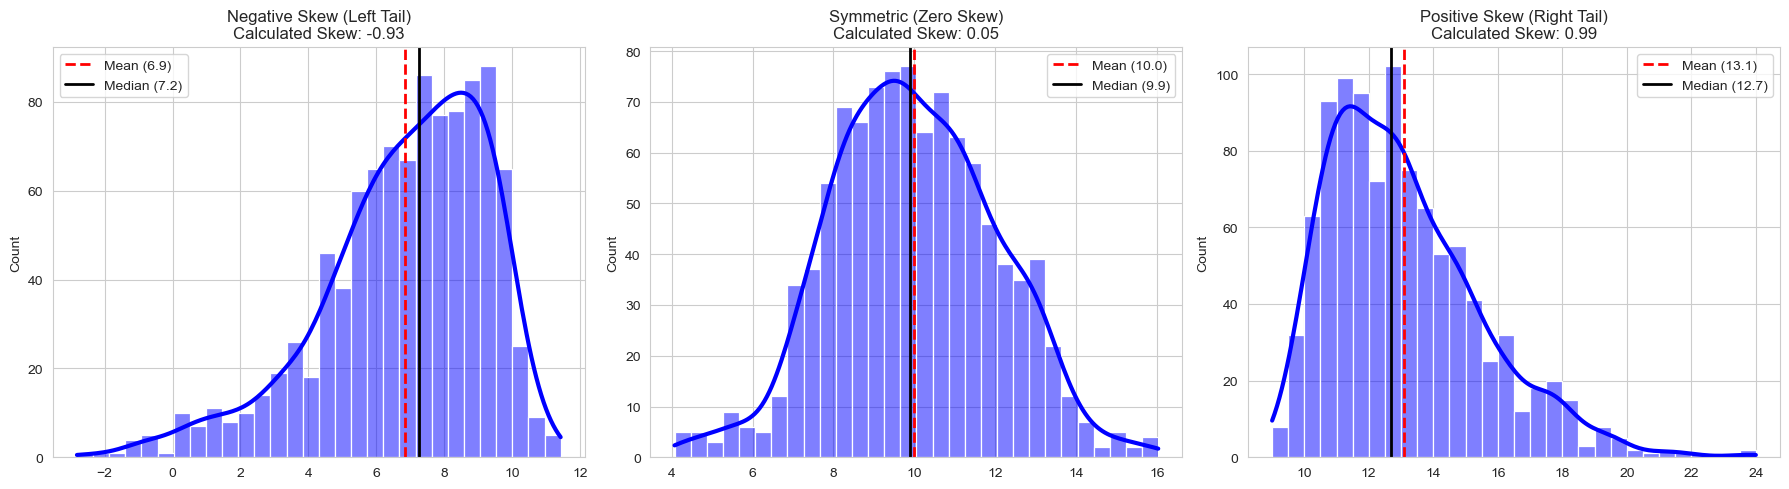

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm, skew

# Set style for plots
sns.set_style("whitegrid")

# Generate Skewed Data using skewnorm (a is the skewness parameter)
neg_skew_data = skewnorm.rvs(a=-7, loc=10, scale=4, size=1000) # Neg Skew
pos_skew_data = skewnorm.rvs(a=7, loc=10, scale=4, size=1000)  # Pos Skew
sym_data = np.random.normal(loc=10, scale=2, size=1000)         # Symmetric

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Negative Skew (Left Tail)', 'Symmetric (Zero Skew)', 'Positive Skew (Right Tail)']
datasets = [neg_skew_data, sym_data, pos_skew_data]

for i, data in enumerate(datasets):
    calculated_skew = skew(data)
    mean_val = np.mean(data)
    median_val = np.median(data)
    
    # Plot Histogram and KDE
    sns.histplot(data, bins=30, kde=True, ax=axes[i], color='blue', line_kws={'linewidth': 3})
    
    # Add Mean (dashed) and Median (solid) lines
    axes[i].axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean ({mean_val:.1f})')
    axes[i].axvline(median_val, color='k', linestyle='-', linewidth=2, label=f'Median ({median_val:.1f})')
    
    axes[i].set_title(f'{titles[i]}\nCalculated Skew: {calculated_skew:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()